# 무신사 실시간 순위 크롤링 하기

### 첫 페이지 실시간 순위 정보들 크롤링하기

In [76]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import time
from tqdm import tqdm

In [77]:
url="https://www.musinsa.com/ranking/best?period=now&age=ALL&mainCategory=001&subCategory=&leafCategory=&price=&golf=false&kids=false&newProduct=false&exclusive=false&discount=false&soldOut=false&page=1&viewType=small&priceMin=&priceMax="
print(url)

https://www.musinsa.com/ranking/best?period=now&age=ALL&mainCategory=001&subCategory=&leafCategory=&price=&golf=false&kids=false&newProduct=false&exclusive=false&discount=false&soldOut=false&page=1&viewType=small&priceMin=&priceMax=


우선 url 을 살펴보자!

In [78]:
pd.read_html(url)

ValueError: No tables found

테이블이 없다는 것을 확인하였으므로 request를 통해 호출해보자

In [196]:
response=requests.get(url)
response.status_code

200

수신은 양호하다! request로 호출을 받아봤고 bs를 이용하여 html을 가져와, 본격적으로 내가 얻고자 하는 데이터들을 추출해보자! 원하는 정보는 다음과 같다.
* 순위에 맞춰 브랜드 이름 가져오기
* 옷의 이름을 가져오기
* 옷 링크 가져오기

In [79]:
html=bs(response.text, 'lxml')
html

<!DOCTYPE html>
<html lang="ko">
<head>
<title>상품 랭킹 | 무신사 스토어</title>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
            new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
        j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
        'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
    })(window,document,'script','dataLayer','GTM-TXDSFSF');</script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="무신사 랭킹은 상품 매출, 판매 수량, 상품 조회 수, 작성 후기 수를 반영한 공식에 의해 선정됩니다.
무신사 스토어는 광고 목적으로 랭킹을 절대 임의 조작하지 않으므로 믿고 구매하셔도 됩니다." name="description"/>
<script type="text/javascript">
            var THIS_PAGE_GF = 'A';
        </script>
<link href="https://image.msscdn.net/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<meta content="648837775133366" id="fbAddId" property="fb:app_id"/>
<meta c

### 실시간 순위, 의류 브랜드명, 의류명, 링크 가져오기

#### 브랜드명 가져오기
경로: #goodsRankList > li:nth-child(1) > div.li_inner > div.article_info > p.item_title > a
* 실시간 순위 옷들의 브랜드부터 가져와보자

* li:nth-child(1) 속의 숫자는 곧 순위에 해당한다.
* 우선 순위별로 브랜드 이름만을 추출하기 위해 brand_list를 만드는데, li:nth-child(1)을 li로 바꾸면 첫페이지의 모든 브랜드 순위를 가져올 수 있다.

In [80]:
#최종
brand_html=html.select('#goodsRankList > li > div.li_inner > div.article_info > p.item_title > a')
brand_html[0].string

'커버낫'

In [81]:
#최종
brand_list=[]
for i in brand_html:
    brand_list.append(i.string)
brand_list[0:5]

['커버낫', '라퍼지스토어', '수아레', '마르디 메크르디', '라퍼지스토어']

#### 의류 이름과 링크 가져오기
경로: #goodsRankList > li:nth-child(1) > div.li_inner > div.article_info > p.list_info > a
* 내가 원하는 두가지의 정보를 모두 가지고 있다
* 이 사이트의 특징은 전부 list로 묶여있고, child의 숫자를 바꾸면 해당 숫자 순위의 정보를 가지고 올 수 있다는 것이다

In [82]:
html.select('#goodsRankList > li:nth-child(1) > div.li_inner > div.article_info > p.list_info > a')

[<a href="https://www.musinsa.com/app/goods/1848166?loc=goods_rank" title="에센셜 쿨 코튼 2-PACK 티셔츠">
                         
                         
                         
                         
                         에센셜 쿨 코튼 2-PACK 티셔츠
                     </a>]

* 브랜드 명을 뽑았을 때와 유사한 방법을 이용하되 이번에는 string을 사용하지 않고  내가 원하는 정보를 추출해보자!   
* 위의 형태를 보면 링크는 href 안에 있고 제목은 title 속에 들어있는 것을 확인할 수 있다.

In [83]:
a=html.select('#goodsRankList > li:nth-child(1) > div.li_inner > div.article_info > p.list_info > a')
a[0]['href']

'https://www.musinsa.com/app/goods/1848166?loc=goods_rank'

**위 방법을 통해 데이터를 추출하는 것이 더 좋아 보이므로 이를 이용하여 데이터를 뽑아보자!**

In [84]:
#최종
link_name_html=html.select('#goodsRankList > li > div.li_inner > div.article_info > p.list_info > a')
link_list=[]
name_list=[]
for i in link_name_html:
    link_list.append(i['href'])
    name_list.append(i['title'])
link_list[0:5], name_list[0:5]

(['https://www.musinsa.com/app/goods/1848166?loc=goods_rank',
  'https://www.musinsa.com/app/goods/1935180?loc=goods_rank',
  'https://www.musinsa.com/app/goods/1954316?loc=goods_rank',
  'https://www.musinsa.com/app/goods/2453556?loc=goods_rank',
  'https://www.musinsa.com/app/goods/2024232?loc=goods_rank'],
 ['에센셜 쿨 코튼 2-PACK 티셔츠',
  '시티보이 빅오버 옥스포드 반팔 셔츠_Sky Blue',
  '[리뉴얼 ver.] 린넨 카라 하프 니트 - 8 COLOR',
  'TSHIRT FLOWERMARDI_IVORY NAVY',
  '시티보이 빅오버 옥스포드 셔츠_Royal Blue'])

#### 순위 가져오기
경로: #goodsRankList > li:nth-child(1) > p  
* 유사한 방법으로 순위를 가져오자

In [86]:
#최종
rank_html=html.select('#goodsRankList > li > p')
rank_no_list=[]
for i in rank_html:
    rank_no_list.append(i.string.strip())
rank_no_list[0:5]

['1위', '2위', '3위', '4위', '5위']

### 각 옷에 대한 상세 정보 가져오기
위의 작업에서 link_list 속에 각 옷에 대한 링크를 넣어주었다. 각각의 링크 속에는 옷에 대한 상세정보와 다양한 정보들을 가지고 있다.  
**그 중 원하는 정보를 추려 데이터를 가져와보자!**

품번, 성별, 조회수(1개월), 누적판매, 좋아요수를 가지고 오는것이 좋을 것 같다!

In [87]:
a=requests.get(link_list[0])
a.status_code

403

위와 같이 상세 정보에 대한 페이지에 접근을 하려고 하니 403 오류가 뜨는 것을 확인할 수 있었다. 이런 경우 headers을 설정해주어야 했고, header에 대한 값을 추가해주었다.

In [117]:
#최종
headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.67 Safari/537.36'}
response_1=requests.get(link_list[32],headers=headers)
response_1.status_code

200

정상적인 접근이라는 정보인 User Agent 정보를 추가하였더니 정상적으로 페이지를 가지고 올 수 있었다.

In [118]:
#최종
html_1=bs(response_1.text, 'lxml')
html_1

<!DOCTYPE html>
<html lang="ko">
<head>
<!-- Google Tag Manager -->
<script>
var selfCertEnabled = "" || "Y";
var THIS_PAGE_GF = 'A'; // 전역필터 상태값 caching page reload 필요 체크용
var dataLayer = window.dataLayer || [];
window.addEventListener("DOMContentLoaded", function() {
    
    (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
            new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
        j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
        'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
    })(window,document,'script','dataLayer','GTM-TXDSFSF');
}, false);
</script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="/favicon.ico?20200213" rel="shortcut icon" type="image/x-icon"/>
<meta content="제품분류 : 상의 &gt; 반소매 티셔츠 브랜드 : 캘빈클라인 진(CALVIN KLEIN JEANS) 제품번호 : J320770 YAF 제품 : 남 J320770 YAF 화이트 클래식 모노그램 로고 반팔 티셔츠 - 71,

### 품번, 성별, 조회수(1개월), 누적판매(1년), 가격 가져오기

#### 품번 가져오기
경로: #product_order_info > div.explan_product.product_info_section > ul > li:nth-child(1) > p.product_article_contents > strong
* 품번은 \<strong> 속에 묶여있다
* 우선 순위별로 브랜드 이름만을 추출하기 위해 brand_list를 만드는데, li:nth-child(1)을 li로 바꾸면 첫페이지의 모든 브랜드 순위를 가져올 수 있다.

In [119]:
a=html_1.select('#product_order_info > div.explan_product.product_info_section > ul > li:nth-child(1) > p.product_article_contents > strong')
a[0].string, a[0].get_text()

(None, 'CALVIN KLEIN JEANS / J320770 YAF')

위에서 보면 알 수 있다시피 .string을 사용하면 None을 반환하는 것을 알 수 있다. 그 이유는 단순히 문자열이 없기 때문이다. 그렇기 때문에 유니코드 형식으로 텍스트를 문자열도 반환하는 get_text()를 사용해줘야 원하는 값이 나온다!

내가 원하는 값을 얻으려는 정보에 대한 코드를 정리하자면 다음과 같다

In [120]:
#최종
part_num_html=html_1.select('#product_order_info > div.explan_product.product_info_section > ul > li:nth-child(1) > p.product_article_contents > strong')
part_num=part_num_html[0].get_text().split('/')[-1].strip()
part_num

'J320770 YAF'

#### 성별 가져오기
경로: #product_order_info > div.explan_product.product_info_section > ul > li:nth-child(2) > p.product_article_contents > span.txt_gender
* 남자와 여자에 대한 정보가 각각 다른 \<span>으로 묶여있다.
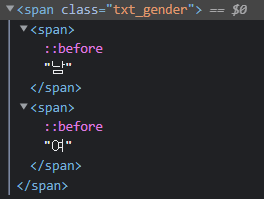
* 즉, 남자 혼자, 여자 혼자, 남자와 여자 일때의 형태가 다를 수도 있으므로 규칙을 찾아야 한다.

In [121]:
a=html_1.select("#product_order_info > div.explan_product.product_info_section > ul > li:nth-child(2) > p.product_article_contents > span.txt_gender")
a[0].get_text()

'\n남\n'

In [161]:
response_2=requests.get(link_list[2],headers=headers)
html_2=bs(response_2.text, 'lxml')
a2 = html_2.select("#product_order_info > div.explan_product.product_info_section > ul > li > p.product_article_contents > span.txt_gender")
a2[0].get_text().replace('\n',' ').strip()

'남'

서로 다른 성별 값을 가지고 있는 링크를 비교해보니, 성별 정보가 하나든 두개든 \n이 사이사이에 있다는 것을 알 수 있다. 그러므로 단순히 \n 값을 없애고, 양옆의 공백만 지워주면 충분할 것 같다! 또한 li:nth-child(2) 에서 3번째 child에 성별의 값이 들어가 있는 요소 또한 존재했다 고로 child를 특정하지 않고 li만 사용해야 할 것 같다!

최종적으로 얻고자 하는 형태의 정보를 얻기 위한 코드는 다음과 같다

In [162]:
#최종
sex_html=html_1.select("#product_order_info > div.explan_product.product_info_section > ul > li > p.product_article_contents > span.txt_gender")
sex=sex_html[0].get_text().replace('\n',' ').strip()
sex

'남'

#### 조회수, 누적판매, 좋아요 수 가져오기
* 조회수 경로: #pageview_1m
* 누적판매 경로: #sales_1y_qty
* 좋아요 경로: #product-top-like > p.product_article_contents.goods_like_2524570 > span

**하지만** 문제가 있다. 조회수, 누적 판매, 그리고 좋아요는 실시간으로 값이 바뀌는 동적 요소이다.  
bs4를 이용하여 위에서 데이터를 뽑아왔던 방법대로 이용해보아도 원하는 데이터가 뽑히지 않다는 것을 확인할 수 있었다. (계속 빈 리스트를 가져올 뿐이었다. 고로 셀레니움을 사용해보기로 했다

#### 조회수

In [95]:
from selenium import webdriver

셀레니움을 설치해주었고, webdriver이라는 것을 가지고 왔다. 셀레니움은 처음 써보지만, 나의 버전과 맞는 chromedriver이라는 것을 다운받아 준 후 가상의 chrome 창을 열어 그 곳에서 원하는 데이터를 가지고 오는 것 같다.

In [96]:
driver = webdriver.Chrome('chromedriver.exe')
driver.get(link_list[0])
sel_html=driver.page_source
html_2=bs(sel_html)

위와 같이 셀리니움을 이용하여 내가 사용하고자 하는 사이트의 페이지를 열어 html doc를 가지고 올 수 있었다. **하지만** 또 다시 한번 문제가 발생했다.

In [97]:
html_2.select('pageview_1m')

[]

위의 코드를 이용하자 또 다시 빈 리스트를 가지고 오는 것을 확인 할 수 있었다.

In [98]:
html_2.find_all("strong", {"id":"pageview_1m"})

[<strong id="pageview_1m">58.2만 회 이상</strong>]

하지만 find_all을 사용하니 문제가 해결되었다.

In [99]:
view_html=html_2.find_all("strong", {"id":"pageview_1m"})
view=view_html[0].get_text()
view

'58.2만 회 이상'

#### 누적 판매
드라이버를 열었으니 누적 판매와 좋아요도 바로 추출해보자

In [100]:
sales_html=html_2.find_all("strong", {"id":"sales_1y_qty"})
sales=sales_html[0].get_text()
sales

'12만 개 이상'

In [101]:
like_html=html_2.find_all("span", {"class": "prd_like_cnt"})
like=like_html[0].get_text()
like

'108,066'

드라이버를 닫아주자!

In [102]:
driver.close()

## 함수로 만들기
지금까지 내가 한 코드들을 이용하여 함수로 만들어 보자!

In [180]:
def musinsa_rank(category_num,page_num):
    url = f"https://www.musinsa.com/ranking/best?period=now&age=ALL&mainCategory=00{category_num}&subCategory=&leafCategory=&price=&golf=false&kids=false&newProduct=false&exclusive=false&discount=false&soldOut=false&page={page_num}&viewType=small&priceMin=&priceMax="
    response = requests.get(url)
    html = bs(response.text, 'lxml')
    musinsa_rank_df = rbnl(html)
    
    return musinsa_rank_df

In [181]:
def rbnl(html):
    musinsa_rank_df = pd.DataFrame()
    
    #순위 뽑기
    rank_html = html.select('#goodsRankList > li > p')
    rank_no_list = []
    
    for i in rank_html:
        rank_no_list.append(i.string.strip())
        
    musinsa_rank_df['순위'] = rank_no_list
    
    #브랜드 이름 뽑기
    brand_html = html.select('#goodsRankList > li > div.li_inner > div.article_info > p.item_title > a')
    brand_list = []
    
    for i in brand_html:
        brand_list.append(i.string)
        
    musinsa_rank_df['브랜드명']=brand_list
    
    #링크와 의류명 뽑기
    link_name_html = html.select('#goodsRankList > li > div.li_inner > div.article_info > p.list_info > a')
    link_list = []
    name_list = []
    
    for i in link_name_html:
        link_list.append(i['href'])
        name_list.append(i['title'])
        
    musinsa_rank_df['의류명']=name_list
    musinsa_rank_df['링크']=link_list
    
    #상세 페이지 크롤링
    musinsa_rank_df2 = specific_info(link_list)
    
    #데이터 프레임 옆으로 합치기
    musinsa_rank_df = pd.concat([musinsa_rank_df, musinsa_rank_df2], axis=1)
    
    return musinsa_rank_df

In [182]:
def specific_info(link_list):
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.67 Safari/537.36'}
    
    musinsa_rank_df = pd.DataFrame()
    part_num_list=[]
    sex_list=[]
    view_list=[]
    sales_list=[]
    like_list=[]
    
    
    for link in tqdm(link_list):
#         print(link)
        response_1=requests.get(link,headers=headers)
        html_1=bs(response_1.text, 'lxml')
        
        #품번 리스트 생성
        part_num_html=html_1.select('#product_order_info > div.explan_product.product_info_section > ul > li:nth-child(1) > p.product_article_contents > strong')
        part_num=part_num_html[0].get_text().split('/')[-1].strip()
        part_num_list.append(part_num)
        
        #성별 리스트 생성
        sex_html=html_1.select("#product_order_info > div.explan_product.product_info_section > ul > li > p.product_article_contents > span.txt_gender")
        sex=sex_html[0].get_text().replace('\n',' ').strip()
        sex_list.append(sex)
        
        #셀레니움으로 원하는 데이터 가져오기
        driver = webdriver.Chrome('chromedriver.exe')
        driver.get(link)
        sel_html=driver.page_source
        html_2=bs(sel_html)
        
        #조회수 가져오기
        view_html=html_2.find_all("strong", {"id":"pageview_1m"})
        view=view_html[0].get_text()
        view_list.append(view)
        
        #누적 판매 가져오기
        sales_html=html_2.find_all("strong", {"id":"sales_1y_qty"})
        sales=sales_html[0].get_text()
        sales_list.append(sales)
        
        #좋아요 수 가져오기
        like_html=html_2.find_all("span", {"class": "prd_like_cnt"})
        like=like_html[0].get_text()
        like_list.append(like)
        
        #드라이버 닫아주기
        driver.close()
        
        #시간 추가
        time.sleep(0.01)
        
    musinsa_rank_df['품번']=part_num_list
    musinsa_rank_df['성별']=sex_list
    musinsa_rank_df['조회수']=view_list
    musinsa_rank_df['누적판매량(1년)']=sales_list
    musinsa_rank_df['좋아요']=like_list
    
    return musinsa_rank_df


## 파일로 저장하기

In [192]:
category_num=input("Category 번호를 입력하세요: ")
page_num=input("Page 번호를 입력하세요: ")
final_df=musinsa_rank(category_num,page_num)

Category 번호를 입력하세요: 2
Page 번호를 입력하세요: 1


100%|██████████████████████████████████████████████████████████████████████████████████| 90/90 [16:45<00:00, 11.18s/it]


In [193]:
file_name = f"musinsa_ranking_category{category_num}_page{page_num}.csv"

In [194]:
final_df.to_csv(file_name, index=False)

In [195]:
pd.read_csv(file_name)

,순위,브랜드명,의류명,링크,품번,성별,조회수,누적판매량(1년),좋아요
0,1위,에스피오나지,Ray Yacht Parka Black,https://www.musinsa.com/app/goods/2343198?loc=...,20220207-18,남,5.1만 회 이상,5.2천 개 이상,"11,225"
1,2위,드로우핏,프리미어 퓨어 캐시미어 발마칸 코트 [BLACK],https://www.musinsa.com/app/goods/2098325?loc=...,DFCT1404BK,남,1천 회 이상,2천 개 이상,"4,227"
2,3위,로파이,오버핏 싱글 라이더스 자켓 램 레더 (블랙),https://www.musinsa.com/app/goods/1749526?loc=...,L00LOSGJK10BK1,남,2.3천 회 이상,100개 이상,"1,144"
3,4위,레테르코모,시티보이 브이넥 니트베스트_블랙,https://www.musinsa.com/app/goods/1958404?loc=...,TO21SS0009,남,8.8만 회 이상,7.3천 개 이상,"10,501"
4,5위,엄브로,DELIGHT 스텐넥 아노락 그레이카키 (UN121CWT22),https://www.musinsa.com/app/goods/2299747?loc=...,UN121CWT22_GKA,남 여,7.7천 회 이상,200개 이상,"1,262"
...,...,...,...,...,...,...,...,...,...
85,86위,닉앤니콜,CREW NECK VEST_BLACK,https://www.musinsa.com/app/goods/2352328?loc=...,S,여,9.6천 회 이상,800개 이상,"4,355"
86,87위,우알롱,Signature hood zip-up - BLACK,https://www.musinsa.com/app/goods/2287431?loc=...,hj_21ss_001bk,남 여,1만 회 이상,2.6천 개 이상,"5,792"
87,88위,니티드,펀칭 니트 베스트 GREEN,https://www.musinsa.com/app/goods/2363718?loc=...,1425041,남 여,8.4천 회 이상,200개 이상,909
88,89위,커버낫,빅 로고 트랙 자켓 라이트 그레이,https://www.musinsa.com/app/goods/2307083?loc=...,CO2201JK08LG,남,9.8천 회 이상,600개 이상,"1,742"


# 무신사 랭킹 데이터 뽑기 완료

## 배운점 및 느낀점
* 많은 오류를 접했는데 오류 메시지를 보는 방법과 오류에 관한 내용을 찾아보는 방법에 대해 많이 알 수 있었다
* 코드가 길어질수록 오타나는 횟수도 같이 많아졌다. 될 수 있는한 자동 완성 기능을 사용하는 것이 더 낫다.
* 코드 속 규칙이 매우 중요하다는 걸 알 수 있었다. 남이 보더라도 알아볼 수 있을 만큼 코드 정리를 잘 해놔야겠다.
* selenium을 처음 사용해보는데, 확실히 가상의 브라우저를 열고 그 안에서 작업을 하다보니 (또한 왜인지는 모르겠으나 chrome driver가 윈도우 32비트용 밖에 없다.) 확실히 bs보다 느리다. 하지만 동적인 요소를 추출하는 경우 selenium이 꼭 필요했다. 유용한 기능을 하나 더 배울 수 있었다.
* 여러 데이터를 뽑을 수록 많은 경로를 접하게 된다. 이때 특히 여러 child로 묶여 있는 경로를 특히 조심하자! 성별에 대한 데이터를 뽑을 때 모든 상세페이지의 child(2)에 성별에 대한 정보가 있는 줄 알았는데, child(3)에 있는 링크도 있었다. 이 문제를 찾는데 정말 오랜 시간이 걸렸음을 절대 잊지 말자!
* 원하던 결과물이 나오게 되어 뿌듯하다.

## 아쉬운 점 및 의문점
* selenuim을 사용할 때, select를 사용하여 원하는 데이터를 뽑고자 하였으나 성공하지 못했고, find_all을 사용하니 원하는 결과를 얻을 수 있었다. 그 이유에 대해 아직 알아내지 못하였다.
* 테이블의 형태인 자료 또한 뽑아보고 싶었지만 무신사 사이트에서 내가 원하고자 하는 정보는 대부분 li로 묶여있던 점이 아쉬웠다.
* selenium을 이용하니 오랜시간이 걸려 렉도 자주 걸려 다른 항목들에 대한 다양한 데이터를 원없이 뽑아보는데 어려움이 있었다.
* 위의 코드에서 num은 다음을 뜻한다.
    * 1:상의, 2:아우터,3:바지, 4:원피스 등... 정말 매우 많다.
    * 이 부분이 직관적이지 못하다는 것이 아쉽다.